In [ ]:
 1.Importing the Relevant Libraries
 2.Reading Data
 3.Data Inspection
 4.Data Cleaning
 5.Data Pre-process
 6.Exploratory Data Analysis
 7.Building Model

1.**Importing the Relevant Libraries**

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import Ridge, Lasso, LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.tree import DecisionTreeClassifier


2.Reading Data

In [ ]:
#Train Data 
Train = pd.read_csv('/content/train3.csv')

#Train Data 
Test =pd.read_csv('/content/public_meta_df.csv')

In [ ]:
Train.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1,False,True,1.77778,86,3,True,False,0,290,3,0,5,6
1,2,False,True,1.33333,1129,2,True,False,0,1443,0,2,5,6
2,3,False,True,1.76667,1163,2,True,False,0,329,0,1,5,6
3,4,False,True,1.77778,1326,2,True,False,0,63,0,3,5,6
4,5,False,True,1.77273,2612,2,True,False,3,37,0,0,5,6


In [ ]:
Test.head()

,comp_id,ad_blocked,embed,ratio,duration,language,partner,partner_active,n_likes,n_tags,n_formats,dayofweek,hour
0,3001,False,True,1.33333,1675,2,False,False,0,10,2,2,3
1,3002,False,True,1.33333,1479,2,False,False,0,10,2,2,3
2,3003,False,True,1.33333,1505,2,False,False,0,10,2,2,3
3,3004,False,True,1.77778,50,2,True,True,1,6,5,2,3
4,3005,False,True,1.33333,1543,2,False,False,0,6,2,2,3


3.Data Inspection

In [ ]:
print(f"Train_data_shape: {Train.shape}\nTest_data_shape: {Test.shape}")

Train_data_shape: (3000, 14)
Test_data_shape: (986, 13)


Training Set consist 3000 rows and 14 columns in Train Set whereas Test set consist 986 rows and 13 columns.

In [ ]:
print(f'Train_Data:\n{Train.isnull().sum()},\n\n\nTest_Data:\n{Test.isnull().sum()}')

Train_Data:
comp_id           0
ad_blocked        0
embed             0
ratio             0
duration          0
language          0
partner           0
partner_active    0
n_likes           0
views             0
n_tags            0
n_formats         0
dayofweek         0
hour              0
dtype: int64,


Test_Data:
comp_id           0
ad_blocked        0
embed             0
ratio             0
duration          0
language          0
partner           0
partner_active    0
n_likes           0
n_tags            0
n_formats         0
dayofweek         0
hour              0
dtype: int64


Their is no NULL value

In [ ]:
Train.dtypes

comp_id             int64
ad_blocked           bool
embed                bool
ratio             float64
duration            int64
language            int64
partner              bool
partner_active       bool
n_likes             int64
views               int64
n_tags              int64
n_formats           int64
dayofweek           int64
hour                int64
dtype: object

5.Data Pre-process

In [ ]:

le = LabelEncoder()

Train_dta= Train[['ad_blocked','embed','partner','partner_active']].apply(le.fit_transform)
Train_set = Train.drop(['ad_blocked','embed','partner','partner_active'],axis ='columns')
Training_set =  pd.concat([Train_dta,Train_set],axis = 'columns')

Training_sets =Training_set.drop(['comp_id'],axis ='columns')

In [ ]:
Training_sets.head()

,ad_blocked,embed,partner,partner_active,ratio,duration,language,n_likes,views,n_tags,n_formats,dayofweek,hour
0,0,1,1,0,1.77778,86,3,0,290,3,0,5,6
1,0,1,1,0,1.33333,1129,2,0,1443,0,2,5,6
2,0,1,1,0,1.76667,1163,2,0,329,0,1,5,6
3,0,1,1,0,1.77778,1326,2,0,63,0,3,5,6
4,0,1,1,0,1.77273,2612,2,3,37,0,0,5,6


Normalizing the Data

In [ ]:
import numpy as np
import pandas as pd

def quantileNormalize(Training_sets):
    df = Training_sets.copy()
    #compute rank
    dic = {}
    for col in df:
        dic.update({col : sorted(df[col])})
    sorted_df = pd.DataFrame(dic)
    rank = sorted_df.mean(axis = 1).tolist()
    #sort
    for col in df:
        t = np.searchsorted(np.sort(df[col]), df[col])
        df[col] = [rank[i] for i in t]
    return df
    print(df.head)

New_traing_data=quantileNormalize(Training_sets)   

**Removing the Outliers**

In [ ]:
from scipy import stats


In [ ]:
z_scores = stats.zscore(New_traing_data)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = New_traing_data[filtered_entries]

new_df.head()

,ad_blocked,embed,partner,partner_active,ratio,duration,language,n_likes,views,n_tags,n_formats,dayofweek,hour
0,1.734615,2.42735,16.367133,1.734615,16.905983,13.982052,52.444445,1.734615,52.444445,28.521368,1.734615,36.213675,24.82906
1,1.734615,2.42735,16.367133,1.734615,4.948718,149.059829,2.811966,1.734615,257.290598,1.734615,3.519231,36.213675,24.82906
2,1.734615,2.42735,16.367133,1.734615,11.289744,152.367522,2.811966,1.734615,59.059829,1.734615,2.504274,36.213675,24.82906
3,1.734615,2.42735,16.367133,1.734615,16.905983,184.444445,2.811966,1.734615,10.981901,1.734615,5.102564,36.213675,24.82906
5,1.734615,2.42735,16.367133,1.734615,16.905983,140.982906,2.811966,1.734615,11.443590,1.734615,3.519231,36.213675,24.82906


In [ ]:
new_df.shape

(2308, 13)

Splitting The Data

In [ ]:
X= new_df.drop(columns = ['views'], axis=1)
y= new_df['views']

# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=32)


To Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

Output Data Pre-Process

In [ ]:
Test1 = Test.drop(['comp_id'],axis ='columns')

Test_set = Test1.drop(['ad_blocked','embed','partner','partner_active'],axis ='columns')

le = LabelEncoder()

Test_dta= Test[['ad_blocked','embed','partner','partner_active']].apply(le.fit_transform)
Testing_set =  pd.concat([Test_dta,Test_set],axis = 'columns')

In [ ]:
Training_sets.boxplot(by ='ratio', column =['views'], grid = False)

Before Removing Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


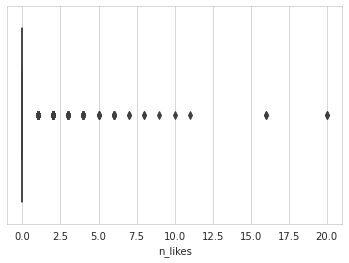

In [ ]:
import seaborn as sns
sns.boxplot(Training_sets['n_likes'])

After Removing Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


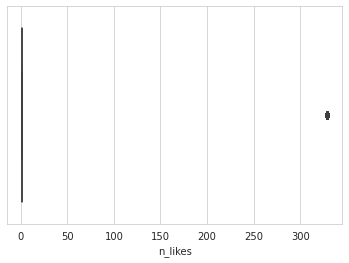

In [ ]:
import seaborn as sns
sns.boxplot(new_df['n_likes'])

** 7.Building Model**

In [ ]:
import xgboost
classifier=xgboost.XGBRegressor()

In [ ]:
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]

learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Defining the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
           

In [ ]:
random_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  4.0min finished


[10:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
SSA =xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
SSA.fit(X,y)

[10:16:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Predicting Data

In [ ]:
pre =SSA.predict(Testing_set)

In [ ]:
import pandas
df3 = pandas.DataFrame(data={ "views":pre})


In [ ]:
df4=df['views']

In [ ]:
test_new = pd.concat([Testing_set,df4],axis = 1)
test_new

,ad_blocked,embed,partner,partner_active,ratio,duration,language,n_likes,n_tags,n_formats,dayofweek,hour,views
0,0,1,0,0,1.33333,1675,2,0,10,2,2,3,163.264542
1,0,1,0,0,1.33333,1479,2,0,10,2,2,3,143.573090
2,0,1,0,0,1.33333,1505,2,0,10,2,2,3,146.185349
3,0,1,1,1,1.77778,50,2,1,6,5,2,3,6.994191
4,0,1,0,0,1.33333,1543,2,0,6,2,2,3,152.709503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,1,1,1,1.77778,46,3,0,2,4,6,13,7.524851
982,0,1,0,0,1.33333,91,2,0,1,2,6,13,12.796430
983,0,1,1,1,1.77778,72,3,0,2,4,6,13,10.532970
984,0,1,0,0,1.33333,82,7,0,9,3,6,13,9.581595


In [ ]:
test_new1 = pd.concat([Testing_set,df3],axis = 1)
test_new1

In [ ]:
train_new1= pd.concat([Training_sets,test_new1],axis =0)
train_new1.shape

X2= train_new1.drop(columns = ['views'], axis=1)
y2= train_new1['views']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()
random_cv1 = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()
random_cv2 = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv2.fit(X2,y2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.5min


[10:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  5.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
random_cv2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor =xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
regressor.fit(X2,y2)

[10:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
prediction =SSA19.predict(Testing_set)

In [ ]:
prediction 

In [ ]:
df6= pandas.DataFrame(data={"comp_id":Test_id , "views":pre1})

In [ ]:
df7= pandas.DataFrame(data={"comp_id":Test_id , "views":prediction})

In [ ]:
test_new3 = pd.concat([Testing_set,df7],axis = 1)
test_new3

train_new3 = pd.concat([Training_sets,test_new3],axis =0)
train_new3.shape

X3= train_new.drop(columns = ['views'], axis=1)
y3= train_new['views']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()
random_cv3 = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv3.fit(X3,y3)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.5min


[11:24:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  5.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
random_cv3.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor2 =xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
SSA20.fit(X3,y3)

[11:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
mypre=regressor2 .predict(Testing_set)

Loading Submission file

In [ ]:
import pandas
df = pandas.DataFrame(data={"comp_id":Test_id , "views":mypre})
df.to_csv(".A9.csv", sep=',',index=False)